<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional: Create your favorite neuron
    
<font size ="3">Write code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. Add three branches to the first dendrite. Set different geometrical properties to your morphology (diameter, lenght). Show the resulting model.  

In [1]:
# imports
import os
import neurom as nm
from neurom import view
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
from hoc2swc import neuron2swc
from neurom.view.matplotlib_utils import (
    update_plot_limits,
)
from neurom import viewer
from neurom.check.runner import CheckRunner
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import svm

--No graphics will be displayed.
/usr/local/lib/python3.8/dist-packages/neurom/utils.py:63: DeprecationWarning: Module `viewer` is deprecated. See the documentation's migration page.
  warn_deprecated(msg)


In [2]:
# Defining the sections
soma = h.Section(name="soma")
first_dend = h.Section(name="first_dend")
sec_dend = h.Section(name="sec_dend")
axon = h.Section(name="axon")
first_branch = h.Section(name="first_branch")
second_branch = h.Section(name="second_branch")
third_branch = h.Section(name="third_branch")

# Geometry
soma.L = soma.diam = 15
first_dend.L = 100
first_dend.diam=5
sec_dend.L=100
sec_dend.diam = 5
axon.L = 200
axon.diam = 7
first_branch.L = 50
first_branch.diam = 3
second_branch.L = 50
second_branch.diam = 3
third_branch.L = 50
third_branch.diam = 3

# Topology
axon.connect(soma(0))
first_dend.connect(soma(1))
sec_dend.connect(soma(1))
first_branch.connect(first_dend(1))
second_branch.connect(first_dend(1))
third_branch.connect(first_dend(1))
h.topology()  # Check the topology


|-|       soma(0-1)
   `|       first_dend(0-1)
     `|       first_branch(0-1)
     `|       second_branch(0-1)
     `|       third_branch(0-1)
   `|       sec_dend(0-1)
 `|       axon(0-1)



1.0

Wrote cell 0 to cell_01hw.swc


cell_01hw.swc:7:warning

cell_01hw.swc:10:warning



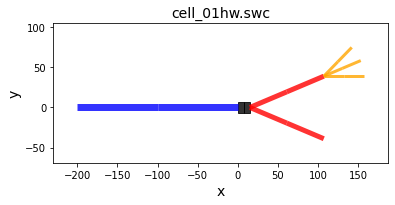

In [3]:
# Visualize in Noto
neuron2swc('cell_01hw.swc', swap_yz=False) 
neuron = nm.load_morphology('cell_01hw.swc')
view.plot_morph(neuron);

# <font color= 'red'>Ex1:</font> Visualizing neurons    
    
<font size ="3">Select one of the neurons from your group data set. Write code that generates two plots:
    
    1. Visualize the neuron oriented in the three possible planes (xy, xz, yz). 
    2. Visualize each of the neurites odf your morphology(in a single plane).

<font size ="3"> For each visualization plot everything in a single plot (use subplots). Make sure to title the figure with cell name and the subplots with respective title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. <font color= 'red'>[1.5 pts]

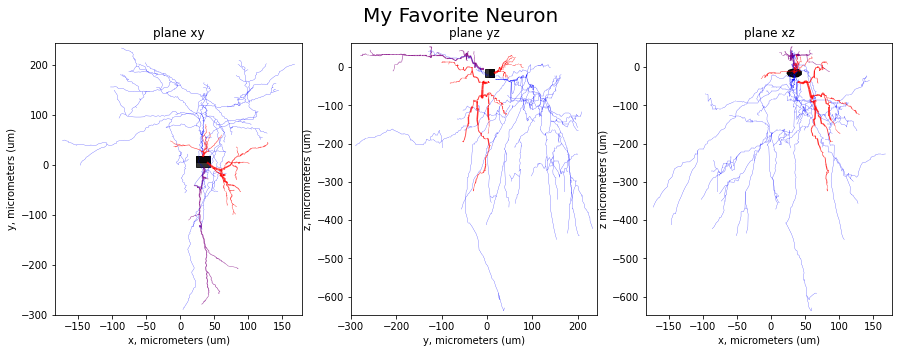

In [4]:
# selection of one of the neuron from the group 3
neuron_10 = nm.load_morphology('data/morph_10.swc')

# plot neuron in different planes
planes = ['xy', 'yz', 'xz']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, plane in enumerate(planes):
    view.plot_morph(neuron_10 , plane=plane, ax=ax[i])
    update_plot_limits(ax[i], white_space=10) 
    # the axis handler is returend for further customization
    ax[i].set_title("plane "+plane)
    
fig.suptitle('My Favorite Neuron', fontsize=20);
    
ax[0].set_xlabel("x, micrometers (um)")
ax[0].set_ylabel("y, micrometers (um)")
ax[1].set_xlabel("y, micrometers (um)")
ax[1].set_ylabel("z, micrometers (um)")
ax[2].set_xlabel("x, micrometers (um)")
ax[2].set_ylabel("z micrometers (um)");

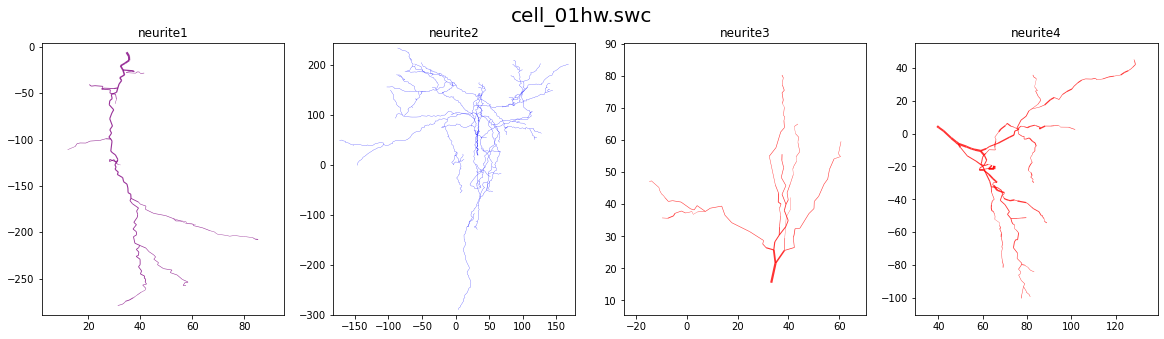

In [5]:
# plot neurites
neurites = neuron_10.neurites

# plot each of the neurites separately
N = len(neurites)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20, 5))  # figsize in inches (width, height)

for i, neurite in enumerate(neurites):
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.plot_tree(neurite, ax=axes[i], plane="xy") #here choose 'xy' plane because it seems tobe the most appropriate one
    update_plot_limits(axes[i], white_space=10)
    # remove the title for each subplot
    axes[i].set_title("neurite"+str(i+1))

# set a global title for the figure
fig.suptitle(neuron.name, fontsize=20);

# <font color= 'red'>Ex2:</font> Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, in your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. <font color= 'red'>[2 pts]

In [6]:
# the structural checks concern the valid structure of a morphology
config = {
    "checks": {
        "morphology_checks": [
            "has_axon",
            "has_basal_dendrite",
            "has_apical_dendrite",
            "has_no_jumps",
            "has_no_fat_ends",
            "has_nonzero_soma_radius",
            "has_all_nonzero_neurite_radii",
            "has_all_nonzero_section_lengths",
            "has_all_nonzero_segment_lengths",
            "has_no_flat_neurites",
            "has_nonzero_soma_radius",
            "has_no_root_node_jumps",
            "has_no_narrow_start",
            "has_no_dangling_branch",
        ]
    },
    "options": {
        "has_nonzero_soma_radius": 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    },
}

# create a CheckRunner object by providing the configuration dict
check_runner = CheckRunner(config)

In [7]:
path = "data/"

for file in os.listdir(path):
    # run on a directory or a morphology
    results = check_runner.run(path + file)

    for morph in results["files"]:

        print("Morphology: {} \n".format(morph))

        checks_dict = results["files"][morph]

        # empty strings for our results
        passed = ""
        failed = ""

        # iterate over dictionary's items
        for check_name, status in checks_dict.items():

            # the string with the check's name and status
            string = "\t{0: <50} : {1}\n".format(check_name, status)

            # separate passed from failed checks
            if status is True:
                passed += string  # concatenates to the current passed string

            else:
                failed += string  # concatenats to the current failed string

        print(passed)
        print(failed)

                Has apical dendrite FAIL
             Has no root node jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
               Has no flat neurites FAIL
                                ALL FAIL


Morphology: data/morph_05.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has apical dendrite                                : False
	Has no root node jumps                             : False
	ALL                                                : False

Morphology: data/morph_07.swc 

	Has axon                                           : True
	Has basal dendrite                           

                       Has no jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no dangling branch FAIL
                                ALL FAIL


Morphology: data/.ipynb_checkpoints/morph_01-checkpoint.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no root node jumps                             : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no jumps                                       : False
	ALL                                                : False

Morphology: data/.ipynb_checkpoints/morph_10-checkpoint.swc 

	Has axon                                     

             Has no root node jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
               Has no flat neurites FAIL
                Has no narrow start FAIL
             Has no dangling branch FAIL
                                ALL FAIL


Morphology: data/morph_09.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no root node jumps                             : False
	ALL                                                : False

Morphology: data/morph_08.swc 

	Has axon                                           : True
	Has basal dendrite                            

             Has no root node jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no dangling branch FAIL
                                ALL FAIL


Morphology: data/morph_06.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no root node jumps                             : False
	ALL                                                : False

Morphology: data/morph_10.swc 

	Has axon                                           : True
	Has basal dendrite                            

                Has apical dendrite FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no root node jumps FAIL
                Has no narrow start FAIL
             Has no dangling branch FAIL
                                ALL FAIL


Morphology: data/morph_04.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True

	Has apical dendrite                                : False
	Has no jumps                                       : False
	Has no fat ends                                    : False
	Has no root node jumps                             : False
	Has no narrow start                                : False
	Has no dangling branch                             : False
	ALL                                                : False



                Has apical dendrite FAIL
               Has no flat neurites FAIL
             Has no root node jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
                                ALL FAIL


Morphology: data/morph_03.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has apical dendrite                                : False
	Has no flat neurites                               : False
	Has no root node jumps                             : False
	ALL                                                : False

Morphology: data/morph_01.swc 

	Has axon                                           : True
	Has basal dendrite                          

             Has no root node jumps FAIL
                                ALL FAIL


Morphology: data/morph_02.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no root node jumps                             : False
	ALL                                                : False



In [8]:
### CHECKER UN NEURON A LA FOIS POUR VOIR LES MIEUX
results = check_runner.run('data/morph_09.swc') #juste changer le numero

for morph in results["files"]:

    print("Morphology: {} \n".format(morph))

    checks_dict = results["files"][morph]

    # empty strings for our results
    passed = ""
    failed = ""

    # iterate over dictionary's items
    for check_name, status in checks_dict.items():

        # the string with the check's name and status
        string = "\t{0: <50} : {1}\n".format(check_name, status)

        # separate passed from failed checks
        if status is True:
            passed += string  # concatenates to the current passed string

        else:
            failed += string  # concatenats to the current failed string

    print(passed)
    print(failed)

             Has no root node jumps FAIL
                                ALL FAIL


Morphology: data/morph_09.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no root node jumps                             : False
	ALL                                                : False



### Errors from the different files 

**morph_O1** :  
- Has jumps  

**morph_O2** :  
- Has root node jumps  

**morph_O3** :
- Has no apical dendrite  
- Has flat neurites  
- Has root node jumps  

**morph_O4** :

- Has no apical dendrite  
- Has jumps  
- Has fat ends  
- Has root node jumps  
- Has narrow start  
- Has dangling branch

**morph_O5** :

- Has no apical dendrite  
- Has root node jumps

**morph_O6** :

- Has root node jumps

**morph_O7** : 

- Has jumps  
- Has fat ends  
- Has flat neurites  

**morph_O8** : 

- Has jumps  
- Has flat neurites  
- Has narrow start  
- Has dangling branch  

**morph_O9** : 

- Has root node jumps 

**morph_10** :

- Has jumps  
- Has flat ends  
- Has dangling branch  



### Explaining these errors means and giving ideas to correct the mistakes 

First we can discard the error **Has no apical dendrite** because it simply characterizes a type of cell. From the Paper 1 we learned that spiny stellate cells (SSCs) *share many characteristics with pyramidal neurons, but lack a prominent apical dendrite.* However, the cells that miss apical dendrites in our folder have other mistakes, therefore we cannot consider them as correct. 

#### Has jumps and root node jumps  

Many of the cells in our folder have jumps or root node jumps. Jumps mean that there was a jump along the Z coordinate during the reconstruction. It happens between the initial point of one branch and the node point that connects at least two branches. Root node jumps happen at root nodes. 

One way to deal with this mistake could be to manually reconnect the segment to its closes neurites components using the microscope again or do it automatically. To do so we can use algorithms like Neurolucida or MorphoML. 

#### Has fat ends

Fat ends are when the end of an arbor is excessively large. A way to tackle this mistake could be to use image processing algorithms to make it thinner. 

#### Has dangling branches

Those are disconnected portions of the arbor that occur during the reconstruction. To reconnect the missing part of the neuron, we could copy and paste a similar neurite from the same morphology class, or use algorithms that predict missing parts using statistical models. 

#### Has flat neurites 

This could be either a characteristic of the neuron or a fail in capturing the 3D shape during the reconstruction. A way to correct this would be to use the microscope again and check if the z dimension was neglected during the reconstruction or of if the neurite is actually flat. 


#### Has narrow start

Axons have a rather constant dimater and dendrites have a changing diameter but if gets narrower at the end and not at the start, which would be a mistake. In order to correct this, as for the fat ends, we can use image processing algorithms and make the start of the neurite larger. 

# <font color= 'red'>Ex3:</font> Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Find the morphometric charachteristics that best enable you to classify the cells into different groups, such as:

    section_lengths, soma_volume, neurite_volume_density, ...

Plot the results for each metric in a histogram. Do you see any differences? If yes, explain them. Would using a combination of morphometric characteristics improve the classification?  <font color= 'red'>[2.5 pts]

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex2 and Ex3.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://academic.oup.com/cercor/article/29/4/1719/5304727)

To determine the morphometric charachteristics of the cells that best enable a correct classification, we can do some "unsupervised classification". That means, we start from a random classification and reassign labels to the cells based on the different morphometric charachteristics until the classifier converges to a stable grouping proposal. If we obtain clear groups we cna consider that the charachteristics is important for the classification. 

In order to determine the most important morphometrics, we all the morphometrics are computed for all the neurons and a combination of unsupervised and unsupervised machine learning techniques is used.

In [9]:
# Create a list of "correct cells"
correct_cells = ['morph_01.swc', 
                 'morph_02.swc',
                 'morph_03.swc',
                 'morph_04.swc',
                 'morph_05.swc',
                 'morph_06.swc',
                 'morph_07.swc',
                 'morph_08.swc',
                 'morph_09.swc',
                 'morph_10.swc'] # this is an exemple we need ot read the papers to know better
# morphometrics 
features = ['max_radial_distance',
            'neurite_volume_density', # possible NaN values by definition 
            'number_of_neurites',
            'number_of_sections_per_neurite',
            'sholl_crossings',
            'sholl_frequency',
            'soma_radius',
            'soma_surface_area',
            'soma_volume',
            'total_area_per_neurite',
            'total_depth',
            'total_height',
            'total_length_per_neurite',
            'total_volume_per_neurite',
            'total_width',
            'trunk_angles',
            'trunk_origin_azimuths',
            'trunk_origin_elevations',
            'trunk_origin_radii',
            'trunk_section_lengths',
            'trunk_vectors']

In [10]:
# prepare the dataset for the machine learning technique by computing all the morphometrics of all the neurons
median_all_neurons = []
neuron_names = []

for cell in correct_cells:
    neuron = nm.load_morphology("data/" + cell)
    neuron_names.append(cell[:-4])
    
    # extraction of all possible features
    median_one_neuron = []
    for feature in features:
        feature_vals = nm.get(feature, neuron)
        median_feature = np.nanmedian(feature_vals) # get the mean of the values
        median_one_neuron.append(median_feature)
    
    median_all_neurons.append(median_one_neuron)

    # final dataset containing the metrics
df_metrics = pd.DataFrame(median_all_neurons, columns = features, index = neuron_names)
df_metrics

/usr/local/lib/python3.8/dist-packages/neurom/features/neurite.py:462: DeprecationWarning: Please use `QhullError` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  except scipy.spatial.qhull.QhullError:
Failure to compute neurite volume using the convex hull. Feature `volume_density` will return `np.nan`.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/neurom/features/neurite.py", line 461, in volume_density
    volume = convex_hull(neurite).volume
  File "/usr/local/lib/python3.8/dist-packages/neurom/geom/__init__.py", line 53, in convex_hull
    return ConvexHull(obj.points[:, COLS.XYZ])
  File "_qhull.pyx", line 2436, in scipy.spatial._qhull.ConvexHull.__init__
  File "_qhull.pyx", line 357, in scipy.spatial._qhull._Qhull.__init__
scipy.spatial._qhull.QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 4)

While executing:  | qhull i Qt
Options selected for Qhull 2019.

,max_radial_distance,neurite_volume_density,number_of_neurites,number_of_sections_per_neurite,sholl_crossings,sholl_frequency,soma_radius,soma_surface_area,soma_volume,total_area_per_neurite,...,total_height,total_length_per_neurite,total_volume_per_neurite,total_width,trunk_angles,trunk_origin_azimuths,trunk_origin_elevations,trunk_origin_radii,trunk_section_lengths,trunk_vectors
morph_01,653.581848,0.000032,3.0,17.0,1.0,13.0,6.307015,499.870635,1287.966612,492.119617,...,622.030029,921.450219,20.915085,1065.329956,2.538975,-1.260034,-0.222508,0.0850,10.012236,-1.510000
morph_02,1302.696045,0.000584,8.0,8.0,1.0,5.0,6.281402,495.818928,1007.721747,781.424361,...,1847.155029,513.790702,108.436434,1048.489990,0.288161,0.656590,0.841548,0.4150,44.591049,4.891962
morph_03,807.127014,0.000242,8.0,8.0,4.0,14.0,6.337366,504.693144,1038.318353,522.473721,...,1156.297974,520.018784,58.669074,1259.190918,0.258301,0.705685,0.531638,0.4925,27.115425,0.867620
morph_04,528.698059,0.001691,56.0,3.0,4.0,11.0,11.227030,1583.943409,7260.004442,135.190254,...,852.659973,146.067187,10.284581,471.630005,0.036576,-1.876724,0.925407,0.1400,51.129868,-10.505000
morph_05,817.916931,0.000475,5.0,13.0,0.0,10.0,7.646645,734.770594,1782.842109,1895.376716,...,1151.882080,899.699341,399.299800,863.613037,1.086264,-1.090713,1.238619,1.2450,22.749224,1.022808
morph_06,1329.827881,0.000122,7.0,15.0,1.0,3.5,7.062379,626.775354,1478.816581,854.512502,...,1605.979004,745.335026,93.827516,474.187012,0.304885,-2.460474,-0.103088,0.7300,8.113599,-3.887847
morph_07,1747.312134,0.009589,5.0,1.0,4.0,4.0,16.883557,3582.100467,24693.927058,75.259033,...,1566.459961,50.482502,10.953136,2273.729980,0.823306,0.923265,-0.350712,0.6000,50.482502,4.240000
morph_08,922.110962,0.015460,7.0,5.0,5.0,2.0,15.555485,3040.723797,19311.635382,1008.945687,...,1063.929932,214.128753,311.047224,426.600006,0.473779,-1.268509,-0.399245,0.4350,15.254786,-2.650000
morph_09,1426.462769,0.000454,7.0,21.0,5.0,13.0,11.646428,1704.493440,6315.132133,3174.334099,...,1948.160034,1383.178036,655.175162,1792.836060,0.373391,-0.409684,0.855126,1.1800,67.828255,1.652151
morph_10,597.975647,0.001488,4.0,18.0,4.0,12.0,13.167845,2178.909757,11714.908548,2681.866091,...,523.010010,915.843899,548.315773,341.559998,1.590055,-1.493324,0.315331,1.1100,23.075197,-0.544999


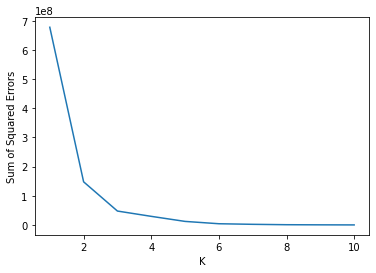

In [11]:
# cluster the cells in different types using unsupervised machine learning technique (kmeans): find the optimal number of clusters using sse
sse = []

for k in range(1, 11): # number of classes from 1 to 10
    # Assign the labels to the clusters
    kmeans = KMeans(n_clusters=k, random_state=10).fit(df_metrics)
    sse.append({"k": k, "sse": kmeans.inertia_})
sse_scores = pd.DataFrame(sse)
    
# Plot the sse score
plt.plot(sse_scores.k, sse_scores.sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors");

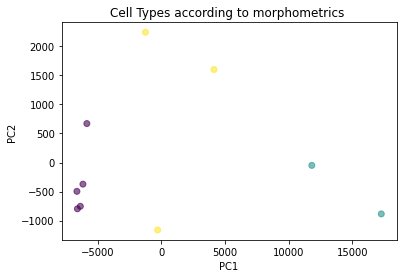

In [12]:
# plot the cells clustered in different cell classes

# reduce the data size using PCA for the plot
df_metrics_reduced= PCA(n_components=2).fit(df_metrics).transform(df_metrics)  

# plot
labels = KMeans(n_clusters=3, random_state=0).fit_predict(df_metrics)
plt.scatter(df_metrics_reduced[:,0], df_metrics_reduced[:,1], c=labels, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Cell Types according to morphometrics ");

We use the sum of squared errors score to chose the optimal parameter k. According to the sse plot, we chose k equal 3 as the best number of clusters, meaning that we identified 3 distinct cell types in our dataset, as shown in the previous plot. These cell types will then be used as labels to help us find the most important features (or morphometrics) using another supervised machine learning technique called svm.

<BarContainer object of 21 artists>

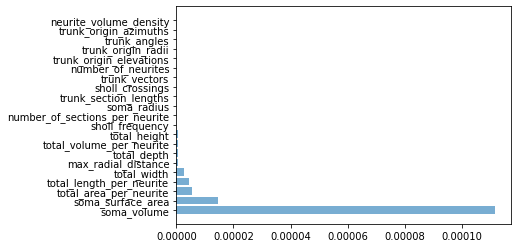

In [13]:
# get most important features using supervised SVM technique and using the labels obtained with kmeans k=3

# model
svm_ = svm.SVC(kernel='linear')
svm_.fit(df_metrics, labels)

# get the most important metrics used by the svm model
feature_coef = []
for name, value in zip(df_metrics.columns, svm_.coef_[0]):
    feature_coef.append({"name": name, "value": abs(value)})
features_importance = pd.DataFrame(feature_coef).sort_values("value", ascending=False)

#plot the features in ascending order
plt.barh(features_importance.name, features_importance.value, alpha=0.6)


In [14]:
print('The morphometric charachteristics that best enable us to classify the cells into different groups are: \n', 
          features_importance.name[0:5].to_string(index=False))

The morphometric charachteristics that best enable us to classify the cells into different groups are: 
              soma_volume
       soma_surface_area
  total_area_per_neurite
total_length_per_neurite
             total_width


We identified the most important features by looking at the largest coefficient in absolute value. 5 metrics are easily identified. Thus, one could only use a combination of these morphometrics to classify the cells in different cell types. It is obvisous that the soma is critical when it comes to distinguish the cell types. Indeed, the soma volume is by far the most important metric, followed by the soma surface whihc is also very important.

In [15]:
def histogram(data):
    """Generates a histogram in a new figure"""

    # create an image with one subplot
    f, ax = plt.subplots(1, 1, figsize=(5, 5))

    # create a histogram with specified bins and normalized
    ax.hist(data, bins=10)
    ax.set_title(
        metrics.replace("_", " ")
    )  # replace the underscores with spaces in the string
    ax.set_xlabel("units")
    ax.set_ylabel("density")

    return f, ax

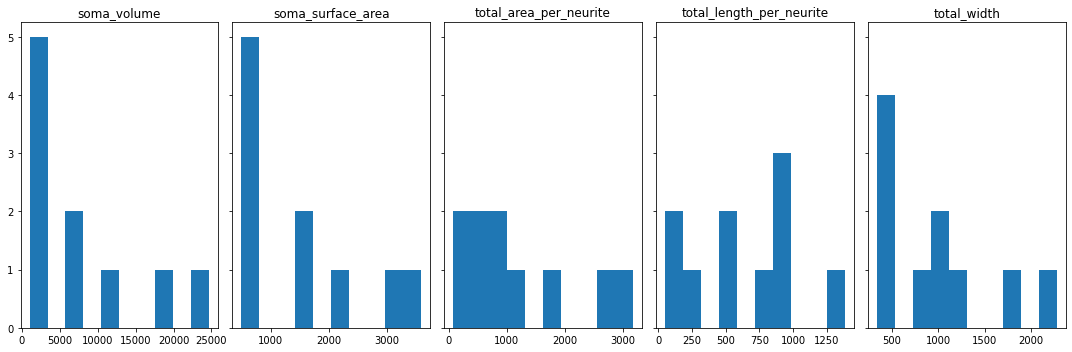

In [16]:
# plot the distribtion of the most important morphometrics accross neurons
fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True, figsize=(15, 5))
morphometrics = list(features_importance.name[0:5])
for i, metrics in enumerate(morphometrics):
    axs[i].hist(df_metrics[metrics])
    axs[i].set_title(metrics)

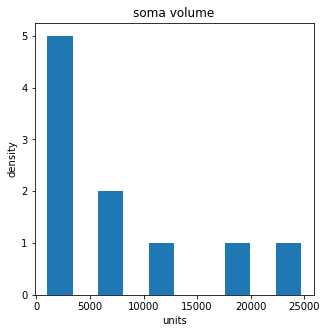

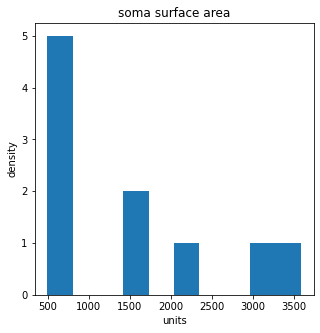

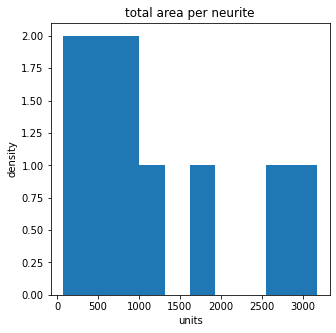

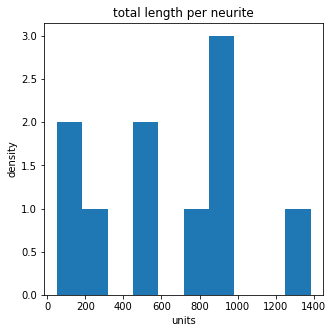

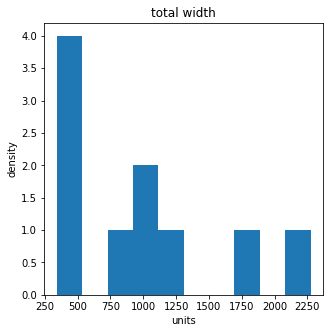

In [17]:
# plot the distribtion of the most important morphometrics accross neurons
morphometrics = list(features_importance.name[0:5])
for metrics in morphometrics:
    histogram(df_metrics[metrics])